In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# import coco
import utils
import model as modellib
import visualize
from model import log
from config import Config

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
COCO_DIR = "images"  # TODO: enter value here
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
print(COCO_DIR, IMAGE_DIR)

Using TensorFlow backend.


images /userhome/cs/adrianxu/my_mask_rcnn/Mask_RCNN/images


In [2]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Uncomment to train on 8 GPUs (default is 1)
    # GPU_COUNT = 8

    # Number of classes (including background)
    # NUM_CLASSES = 1 + 80  # COCO has 80 classes
    NUM_CLASSES = 1 + 1  # Person and background

    NUM_KEYPOINTS = 17
    MASK_SHAPE = [28, 28]
    KEYPOINT_MASK_SHAPE = [56,56]
    # DETECTION_MAX_INSTANCES = 50
    TRAIN_ROIS_PER_IMAGE = 100
    MAX_GT_INSTANCES = 128
    RPN_TRAIN_ANCHORS_PER_IMAGE = 150
    USE_MINI_MASK = True
    MASK_POOL_SIZE = 14
    KEYPOINT_MASK_POOL_SIZE = 7
    LEARNING_RATE = 0.002
    STEPS_PER_EPOCH = 1000
    WEIGHT_LOSS = True
    KEYPOINT_THRESHOLD = 0.005

    PART_STR = ["nose","left_eye","right_eye","left_ear","right_ear","left_shoulder",
                "right_shoulder","left_elbow","right_elbow","left_wrist","right_wrist",
                "left_hip","right_hip","left_knee","right_knee","left_ankle","right_ankle"]
    LIMBS = [0,-1,-1,5,-1,6,5,7,6,8,7,9,8,10,11,13,12,14,13,15,14,16]

Person_ID = 1

In [3]:
class InferenceConfig(CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7

inference_config = InferenceConfig()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=inference_config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use `tf.cast` instead.



Processing 1 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000
windows                  shape: (1, 4)                min:    0.00000  max: 1024.00000
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:   -9.33259  max:  153.62883
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00001  max:    0.99999
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -3.03281  max:    3.35434
detections               shape: (1, 100, 6)           min:    0.00000  max: 1020.00000
mrcnn_mask               shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    0.99975
mrcnn_keypoint_prob    

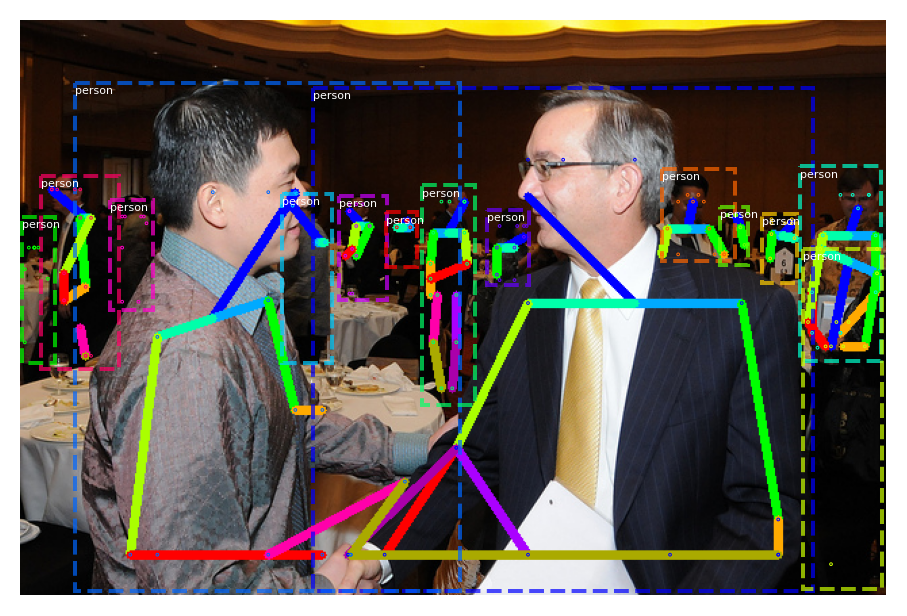

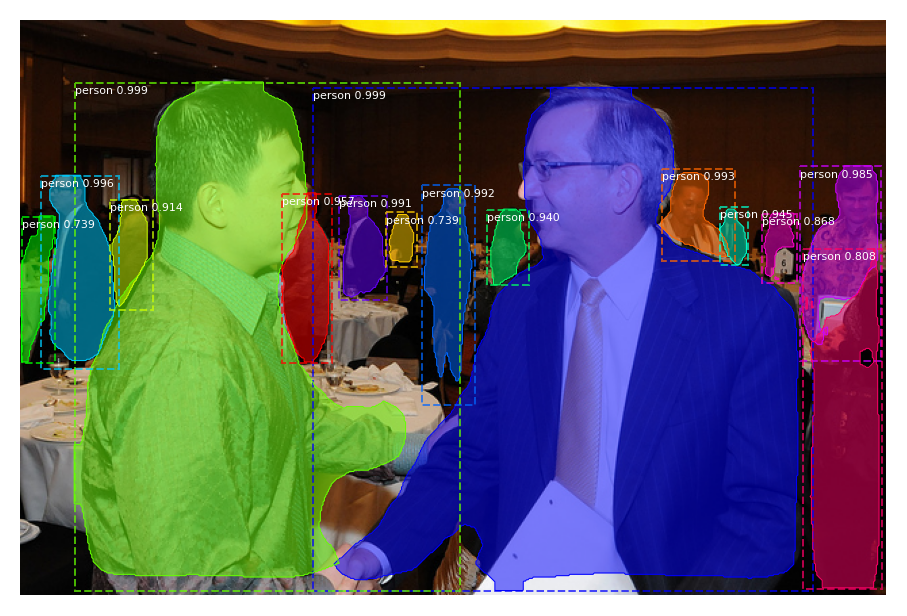

In [5]:
import cv2
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'person']
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, '000000004134.jpg'))
image = cv2.imread(os.path.join(IMAGE_DIR, '000000004134.jpg'))
#BGR->RGB
image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=1)
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names,skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


Processing 1 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000
windows                  shape: (1, 4)                min:    0.00000  max: 1024.00000
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:  -16.96884  max:  124.04167
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -3.32144  max:    3.17570
detections               shape: (1, 100, 6)           min:    0.00000  max:  797.00000
mrcnn_mask               shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    0.99992
mrcnn_keypoint_prob    

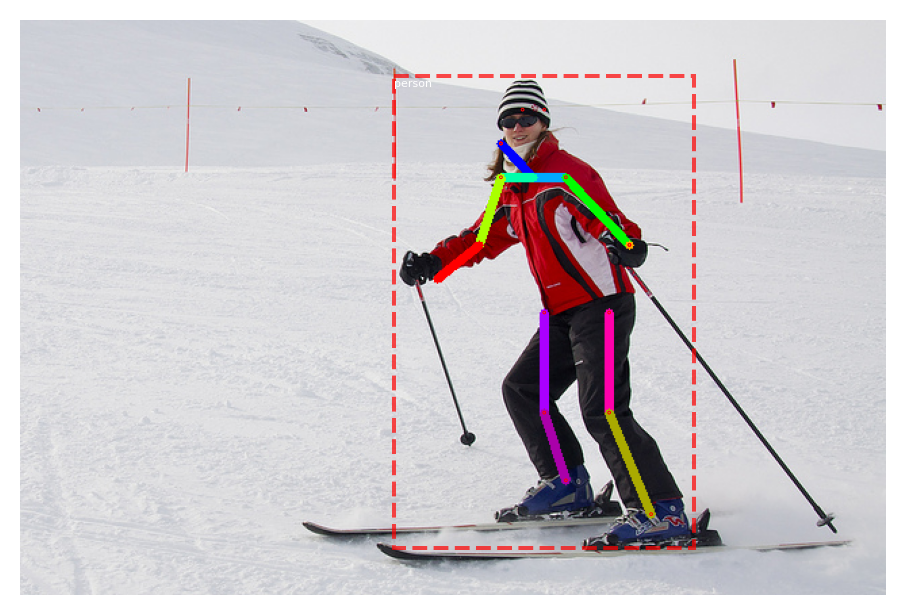

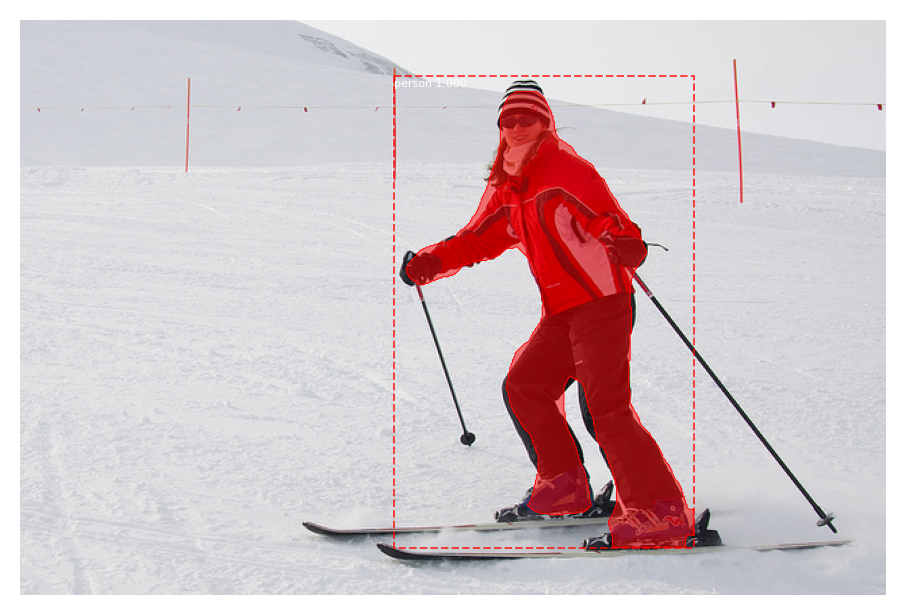

In [6]:
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'person']
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, '000000000785.jpg'))
image = cv2.imread(os.path.join(IMAGE_DIR, '000000000785.jpg'))
#BGR->RGB
image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=1)
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names,skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])